# Our Project Thingy on Antibiotic Resistance


In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('fivethirtyeight')
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [2]:
sample1 = pd.read_csv('GSM3147945_WT1_S7.txt', delimiter = '\t')

In [3]:
sample1.drop([0, 1, 2, 3], axis=0)

,Feature ID,Wild-type - WT1_S7 (GE) - Expression values,Wild-type - WT1_S7 (GE) - Unique gene reads,Wild-type - WT1_S7 (GE) - Total gene reads
4,SAOUHSC_02518,6,6,6
5,SAOUHSC_A02577,2,2,2
6,SAOUHSC_01295,10,10,10
7,SAOUHSC_02705,3,3,3
8,SAOUHSC_01290,37,37,37
...,...,...,...,...
2867,SAOUHSC_02939,0,0,0
2868,SAOUHSC_02948,0,0,0
2869,SAOUHSC_02950,1,1,1
2870,SAOUHSC_A01436,0,0,0


## EDA

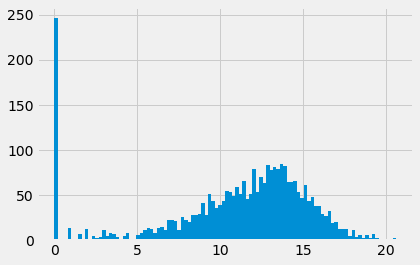

In [6]:
plt.hist(np.log2(sample1.iloc[:, 3] + 1), bins = 100);


In [88]:
np.count_nonzero(sample1.iloc[:, 1] != sample1.iloc[:, 3]), \
np.count_nonzero(sample1.iloc[:, 2] != sample1.iloc[:, 3]), \
np.count_nonzero(sample1.iloc[:, 1] != sample1.iloc[:, 2])


(0, 165, 165)

Total Gene Reads (col 3) are equal to Expression Values (col 1), and both are always equal to or greater than Unique Gene Reads (col 2). We will combine col 3 of all five samples.